<a href="https://colab.research.google.com/github/chaandini2001/intro-ml-course-winter2025/blob/main/Project_Phase2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Data**

Data Source: TMU DM+Complic+Med Category 808K Jan 2025 R1.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import warnings
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import io

#warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')

Mounted at /content/drive


<ipython-input-3-c0e5fc0962d8>:18: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')


In [ ]:
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample(5)

,Age_at_Exam,Sex,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Patient_ID,DM_OnsetDate,DM_Onset_Revised_1YrPrior,[Amputation),[Amputation_Date],[Anxiety),[Anxiety_Date],[Arrhythmia),[Arrhythmia_Date],[AtrialFibrillation),[AtrialFibrillation_Date],[Blindness),[Blindness_Date],[CABG),[CABG_Date],[CAD),[CAD_Date],[Cancer),[Cancer_Date],[Cardiomyopathy),[Cardiomyopathy_Date],[Cataract),[Cataract_Date],[CKD),[CKD_Date],[Deceased),[Deceased_Date],[Depression),[Depression_Date],[DiabeticFootUlcer),[DiabeticFootUlcer_Date],[Dialysis),[Dialysis_Date],[Enteropathy),[Enteropathy_Date],[ESRD),[ESRD_Date],[Gangrene),[Gangrene_Date],[Gastroparesis),[Gastroparesis_Date],[GERD),[GERD_Date],[Glaucoma),[Glaucoma_Date],[HeartTransplant),[HeartTransplant_Date],[IntermittentClaudication),[IntermittentClaudication_Date],[KidneyTransplant),[KidneyTransplant_Date],[Microalbuminuria),[Microalbuminuria_Date],[MyocardialInfarct),[MyocardialInfarct_Date],[NAFLD),[NAFLD_Date],[Nephropathy),[Nephropathy_Date],[Neuropathy),[Neuropathy_Date],[PeritonealDialysis),[PeritonealDialysis_Date],[Proteinuria),[Proteinuria_Date],[PVD),[PVD_Date],[RetinalTear),[RetinalTear_Date],[Retinopathy),[Retinopathy_Date],[RIND),[RIND_Date],[Sarcoma),[Sarcoma_Date],[Stent),[Stent_Date],[Stroke),[Stroke_Date],[TIA),[TIA_Date],[UTI),[UTI_Date],concat(DiagnosisText_Orig),Year,C_R1_MatchRule,C_R1_FoundWords,C_R1_FoundMoreThanOnceBinary,C_R1_FoundMoreThanOnceWords,C_R1_FoundNum_RepeatNo,C_R1_FoundNum_RepeatYes,C_R1_ReplacedWords,C_R1_ReplacedOrNotBinary,C_R1_ReplacedMoreThanOnceBinary,C_R1_ReplacedMoreThanOnceWords,C_R1_ReplacedNum_RepeatNo,b_R1_skin,b_R1_foot,b_R1_psych,b_R1_heart,b_R1_eye,b_R1_cancer,b_R1_kidney,b_R1_brain,b_R1_death,b_R1_gastric,b_R1_pancreas,b_R1_sleep,first_b_R1_[2ndline-antidiabetic],first_StartDate_b_R1_[2ndline-antidiabetic],first_StopDate_b_R1_[2ndline-antidiabetic],last_b_R1_[2ndline-antidiabetic],last_StartDate_b_R1_[2ndline-antidiabetic],last_StopDate_b_R1_[2ndline-antidiabetic],duration_b_R1_[2ndline-antidiabetic]_Days,total_b_R1_[2ndline-antidiabetic]_Records,first_b_R1_[anticholesterol],first_StartDate_b_R1_[anticholesterol],first_StopDate_b_R1_[anticholesterol],last_b_R1_[anticholesterol],last_StartDate_b_R1_[anticholesterol],last_StopDate_b_R1_[anticholesterol],duration_b_R1_[anticholesterol]_Days,total_b_R1_[anticholesterol]_Records,first_b_R1_[antihtn],first_StartDate_b_R1_[antihtn],first_StopDate_b_R1_[antihtn],last_b_R1_[antihtn],last_StartDate_b_R1_[antihtn],last_StopDate_b_R1_[antihtn],duration_b_R1_[antihtn]_Days,total_b_R1_[antihtn]_Records,first_b_R1_[corticosteroid],first_StartDate_b_R1_[corticosteroid],first_StopDate_b_R1_[corticosteroid],last_b_R1_[corticosteroid],last_StartDate_b_R1_[corticosteroid],last_StopDate_b_R1_[corticosteroid],duration_b_R1_[corticosteroid]_Days,total_b_R1_[corticosteroid]_Records,first_b_R1_[1stlineantidiabetic],first_StartDate_b_R1_[1stlineantidiabetic],first_StopDate_b_R1_[1stlineantidiabetic],last_b_R1_[1stlineantidiabetic],last_StartDate_b_R1_[1stlineantidiabetic],last_StopDate_b_R1_[1stlineantidiabetic],duration_b_R1_[1stlineantidiabetic]_Days,total_b_R1_[1stlineantidiabetic]_Records
370243,80,Female,130.0,2009-07-23,26.000000,2009-07-16,2.36,2009-07-20,1.53,2009-07-20,NaN,NaN,0.86,2009-07-20,5.4,2009-07-20,4.29,2009-07-20,0,0,NaN,0,NaN,1,2005-10-20,1,2005-05-19,1002000000154106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN,NaN,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2

#**Data Preparation**

Filtering data to only include patients diabetes

In [ ]:
patients_with_diabetes = df.loc[df["Diabetes"] == 1, "Patient_ID"].dropna().unique()
df_diabetes = df[df["Patient_ID"].isin(list(patients_with_diabetes))]
df_diabetes.shape

(234464, 175)

Creating target variable: patients with anxiety/depression/both

In [ ]:
df_diabetes = df_diabetes.copy()
df_diabetes["Has_Any_Psych_Condition"] = (
    (df_diabetes["[Anxiety)"] == 1) |
    (df_diabetes["Depression"] == 1)
).astype(int)

Filtering for last record of each patient

In [ ]:
df_last_record = df_diabetes.sort_values(by="sBP_Date", ascending=False).drop_duplicates(subset="Patient_ID", keep="first")
df_last_record.head()

,Age_at_Exam,Sex,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Patient_ID,DM_OnsetDate,DM_Onset_Revised_1YrPrior,[Amputation),[Amputation_Date],[Anxiety),[Anxiety_Date],[Arrhythmia),[Arrhythmia_Date],[AtrialFibrillation),[AtrialFibrillation_Date],[Blindness),[Blindness_Date],[CABG),[CABG_Date],[CAD),[CAD_Date],[Cancer),[Cancer_Date],[Cardiomyopathy),[Cardiomyopathy_Date],[Cataract),[Cataract_Date],[CKD),[CKD_Date],[Deceased),[Deceased_Date],[Depression),[Depression_Date],[DiabeticFootUlcer),[DiabeticFootUlcer_Date],[Dialysis),[Dialysis_Date],[Enteropathy),[Enteropathy_Date],[ESRD),[ESRD_Date],[Gangrene),[Gangrene_Date],[Gastroparesis),[Gastroparesis_Date],[GERD),[GERD_Date],[Glaucoma),[Glaucoma_Date],[HeartTransplant),[HeartTransplant_Date],[IntermittentClaudication),[IntermittentClaudication_Date],[KidneyTransplant),[KidneyTransplant_Date],[Microalbuminuria),[Microalbuminuria_Date],[MyocardialInfarct),[MyocardialInfarct_Date],[NAFLD),[NAFLD_Date],[Nephropathy),[Nephropathy_Date],[Neuropathy),[Neuropathy_Date],[PeritonealDialysis),[PeritonealDialysis_Date],[Proteinuria),[Proteinuria_Date],[PVD),[PVD_Date],[RetinalTear),[RetinalTear_Date],[Retinopathy),[Retinopathy_Date],[RIND),[RIND_Date],[Sarcoma),[Sarcoma_Date],[Stent),[Stent_Date],[Stroke),[Stroke_Date],[TIA),[TIA_Date],[UTI),[UTI_Date],concat(DiagnosisText_Orig),Year,C_R1_MatchRule,C_R1_FoundWords,C_R1_FoundMoreThanOnceBinary,C_R1_FoundMoreThanOnceWords,C_R1_FoundNum_RepeatNo,C_R1_FoundNum_RepeatYes,C_R1_ReplacedWords,C_R1_ReplacedOrNotBinary,C_R1_ReplacedMoreThanOnceBinary,C_R1_ReplacedMoreThanOnceWords,C_R1_ReplacedNum_RepeatNo,b_R1_skin,b_R1_foot,b_R1_psych,b_R1_heart,b_R1_eye,b_R1_cancer,b_R1_kidney,b_R1_brain,b_R1_death,b_R1_gastric,b_R1_pancreas,b_R1_sleep,first_b_R1_[2ndline-antidiabetic],first_StartDate_b_R1_[2ndline-antidiabetic],first_StopDate_b_R1_[2ndline-antidiabetic],last_b_R1_[2ndline-antidiabetic],last_StartDate_b_R1_[2ndline-antidiabetic],last_StopDate_b_R1_[2ndline-antidiabetic],duration_b_R1_[2ndline-antidiabetic]_Days,total_b_R1_[2ndline-antidiabetic]_Records,first_b_R1_[anticholesterol],first_StartDate_b_R1_[anticholesterol],first_StopDate_b_R1_[anticholesterol],last_b_R1_[anticholesterol],last_StartDate_b_R1_[anticholesterol],last_StopDate_b_R1_[anticholesterol],duration_b_R1_[anticholesterol]_Days,total_b_R1_[anticholesterol]_Records,first_b_R1_[antihtn],first_StartDate_b_R1_[antihtn],first_StopDate_b_R1_[antihtn],last_b_R1_[antihtn],last_StartDate_b_R1_[antihtn],last_StopDate_b_R1_[antihtn],duration_b_R1_[antihtn]_Days,total_b_R1_[antihtn]_Records,first_b_R1_[corticosteroid],first_StartDate_b_R1_[corticosteroid],first_StopDate_b_R1_[corticosteroid],last_b_R1_[corticosteroid],last_StartDate_b_R1_[corticosteroid],last_StopDate_b_R1_[corticosteroid],duration_b_R1_[corticosteroid]_Days,total_b_R1_[corticosteroid]_Records,first_b_R1_[1stlineantidiabetic],first_StartDate_b_R1_[1stlineantidiabetic],first_StopDate_b_R1_[1stlineantidiabetic],last_b_R1_[1stlineantidiabetic],last_StartDate_b_R1_[1stlineantidiabetic],last_StopDate_b_R1_[1stlineantidiabetic],duration_b_R1_[1stlineantidiabetic]_Days,total_b_R1_[1stlineantidiabetic]_Records,Has_Any_Psych_Condition
705217,64,Female,126.0,2015-06-30,27.548209,2014-12-03,3.19,2015-05-29,1.99,2015-05-29,6.5,2015-05-29,0.80,2015-05-29,5.7,2015-05-29,5.54,2015-05-29,1,0,NaN,0,NaN,0,NaN,0,NaN,4001000000244672,2009-06-05,2008-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual Foot Exam Sept 2012|CHOLECYSTECTOMY| ...,2015,"""SLEEP.*APN""","""SLEEP.*APN""",0,NaN,1,1,"""sle

In [ ]:
df_last_record.shape

(25920, 176)

Creating data with only feature and target variables

In [ ]:
selected = df_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Has_Any_Psych_Condition"
]]

# Assuming your DataFrame is named df
selected = pd.get_dummies(selected, columns=['Sex'], drop_first=True)


##Dealing with Missingness

In [ ]:
# Calculate missingness in each variable
missing_counts = selected.isna().sum()  # Count of missing values per column
total_counts = selected.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

                         Missing Percentage
Age_at_Exam                        0.000000
sBP                                0.123457
LDL                                1.107253
TG                                 1.076389
FBS                                0.000000
b_R1_skin                          0.000000
b_R1_foot                          0.000000
b_R1_heart                         0.000000
b_R1_eye                           0.000000
b_R1_cancer                        0.000000
b_R1_kidney                        0.000000
b_R1_brain                         0.000000
b_R1_death                         0.000000
b_R1_gastric                       0.000000
b_R1_pancreas                      0.000000
b_R1_sleep                         0.000000
Has_Any_Psych_Condition            0.000000
Sex_Male                           0.000000


In [ ]:
# Imputting missing values
selected = selected.assign(
    sBP=selected["sBP"].fillna(selected["sBP"].mean()),
    LDL=selected["LDL"].fillna(selected["LDL"].mean()),
    TG=selected["TG"].fillna(selected["TG"].median())
)

#**Descriptive Statisitics**


In [ ]:
# Baseline Characteristics
selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_at_Exam,25920.0,63.748958,13.487742,18.0,55.00,65.00,74.00,90.00
sBP,25920.0,129.687809,15.732835,40.0,120.00,130.00,139.00,240.00
LDL,25920.0,2.347432,0.935155,0.1,1.66,2.19,2.92,9.09
TG,25920.0,1.702572,1.159176,0.1,1.05,1.46,2.06,57.34
FBS,25920.0,7.352567,2.361077,2.2,5.90,6.80,8.10,34.10
b_R1_skin,25920.0,0.032986,0.178604,0.0,0.00,0.00,0.00,1.00
b_R1_foot,25920.0,0.013387,0.114929,0.0,0.00,0.00,0.00,1.00
b_R1_heart,25920.0,0.051659,0.221342,0.0,0.00,0.00,0.00,1.00
b_R1_eye,25920.0,0.023573,0.151716,0.0,0.00,0.00,0.00,1.00
b_R1_cancer,25920.0,0.035725,0.185608,0.0,0.00,0.00,0.00,1.00


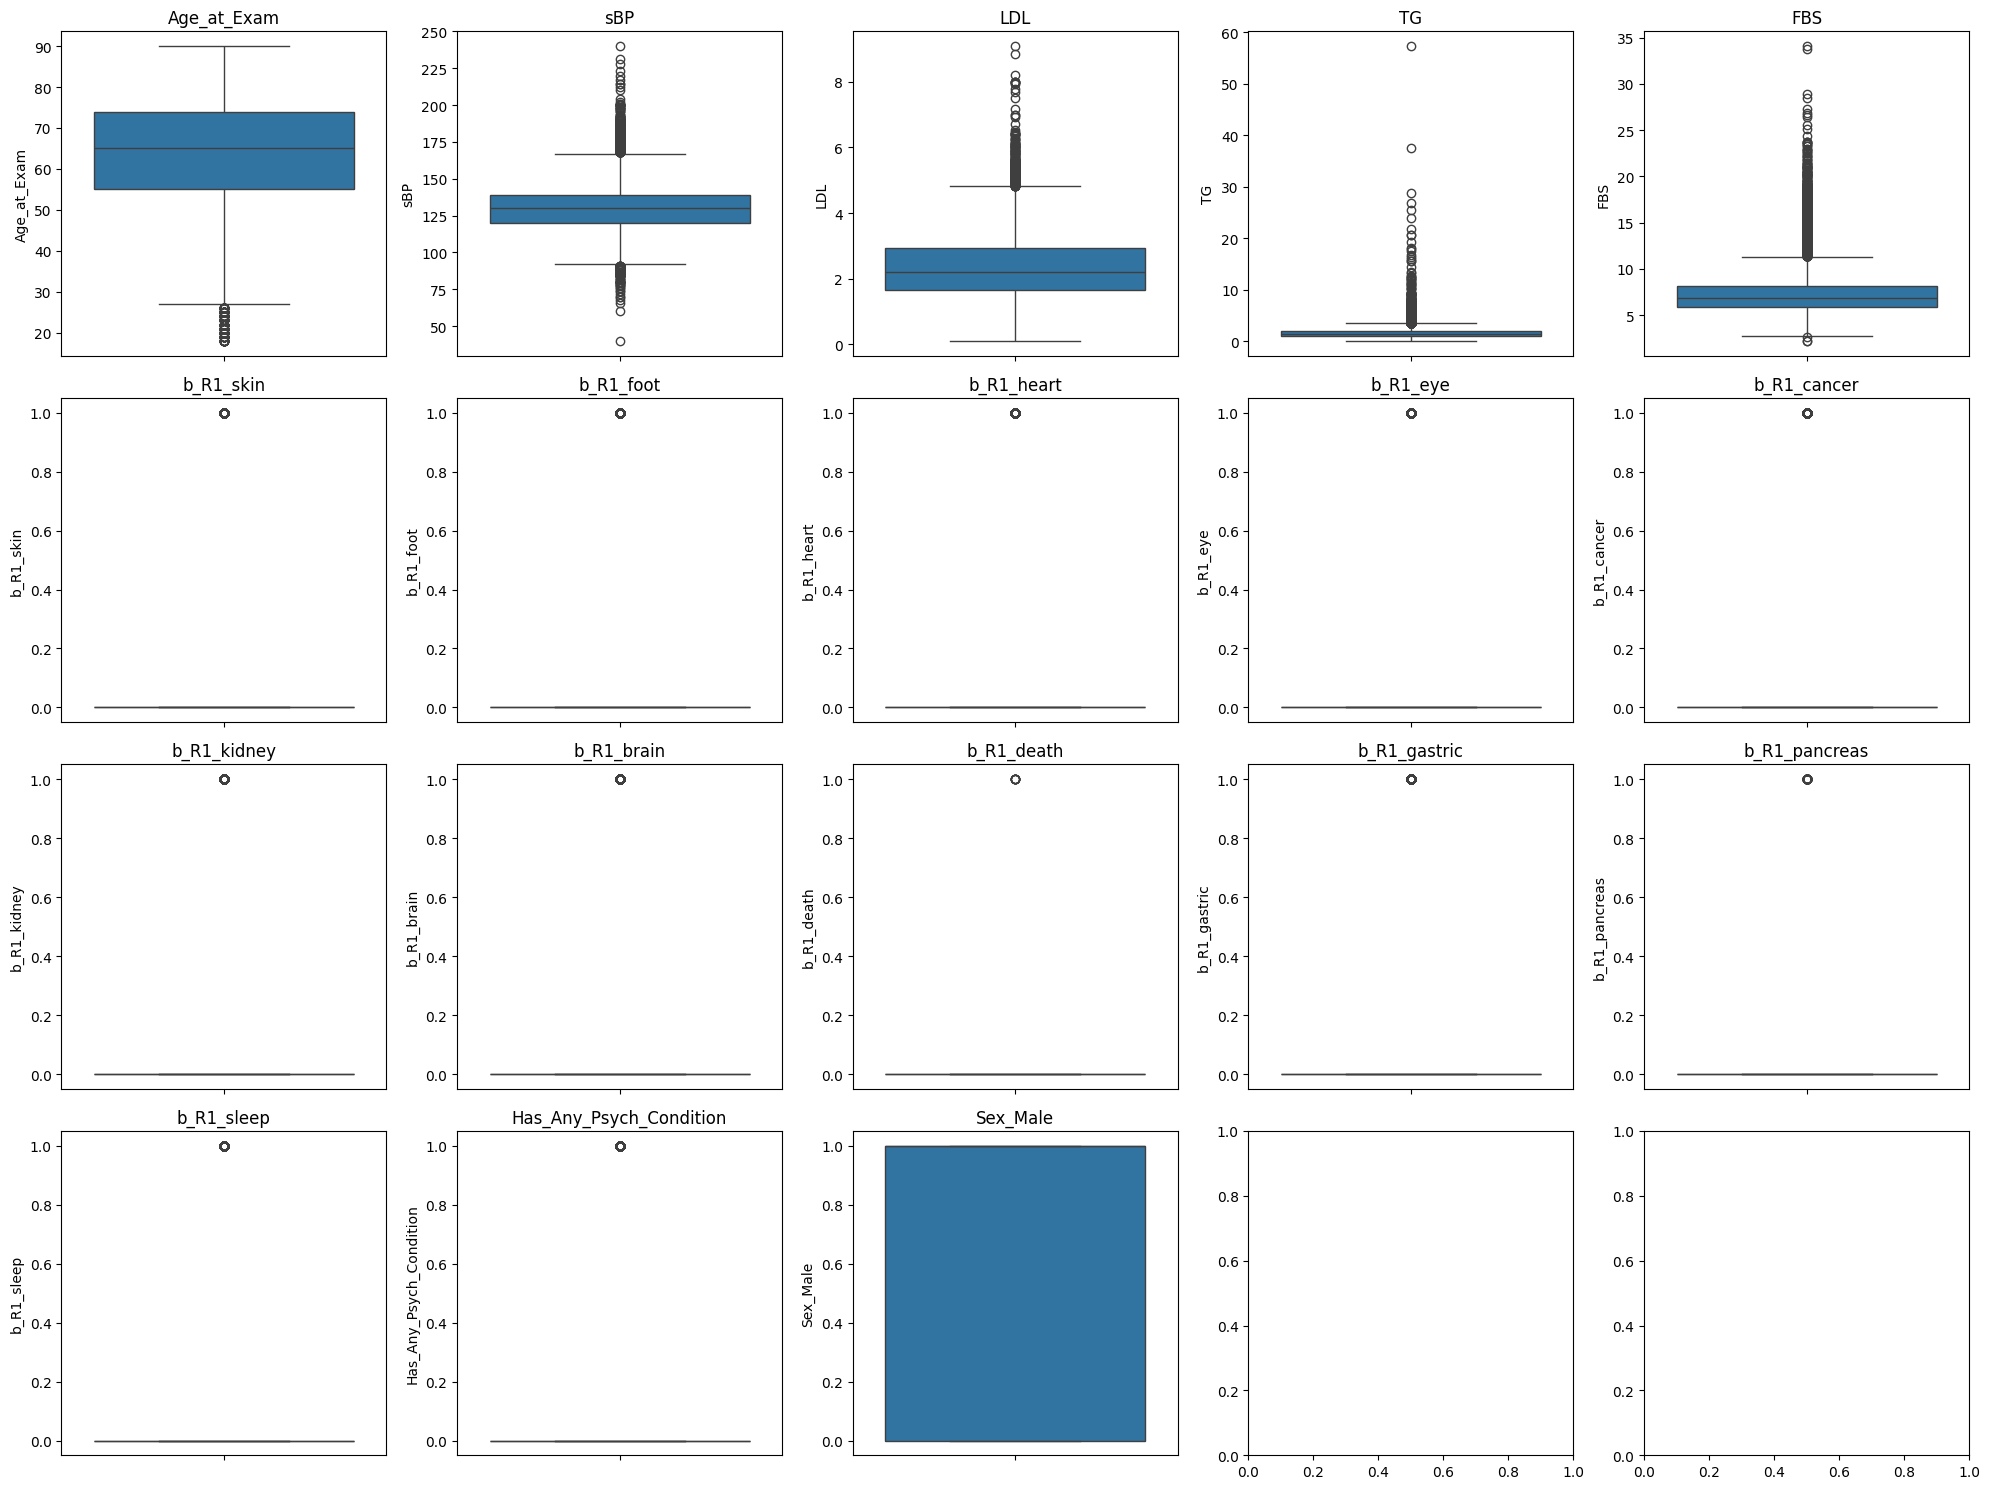

In [ ]:
# Box Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selected.columns):
    sns.boxplot(y=selected[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

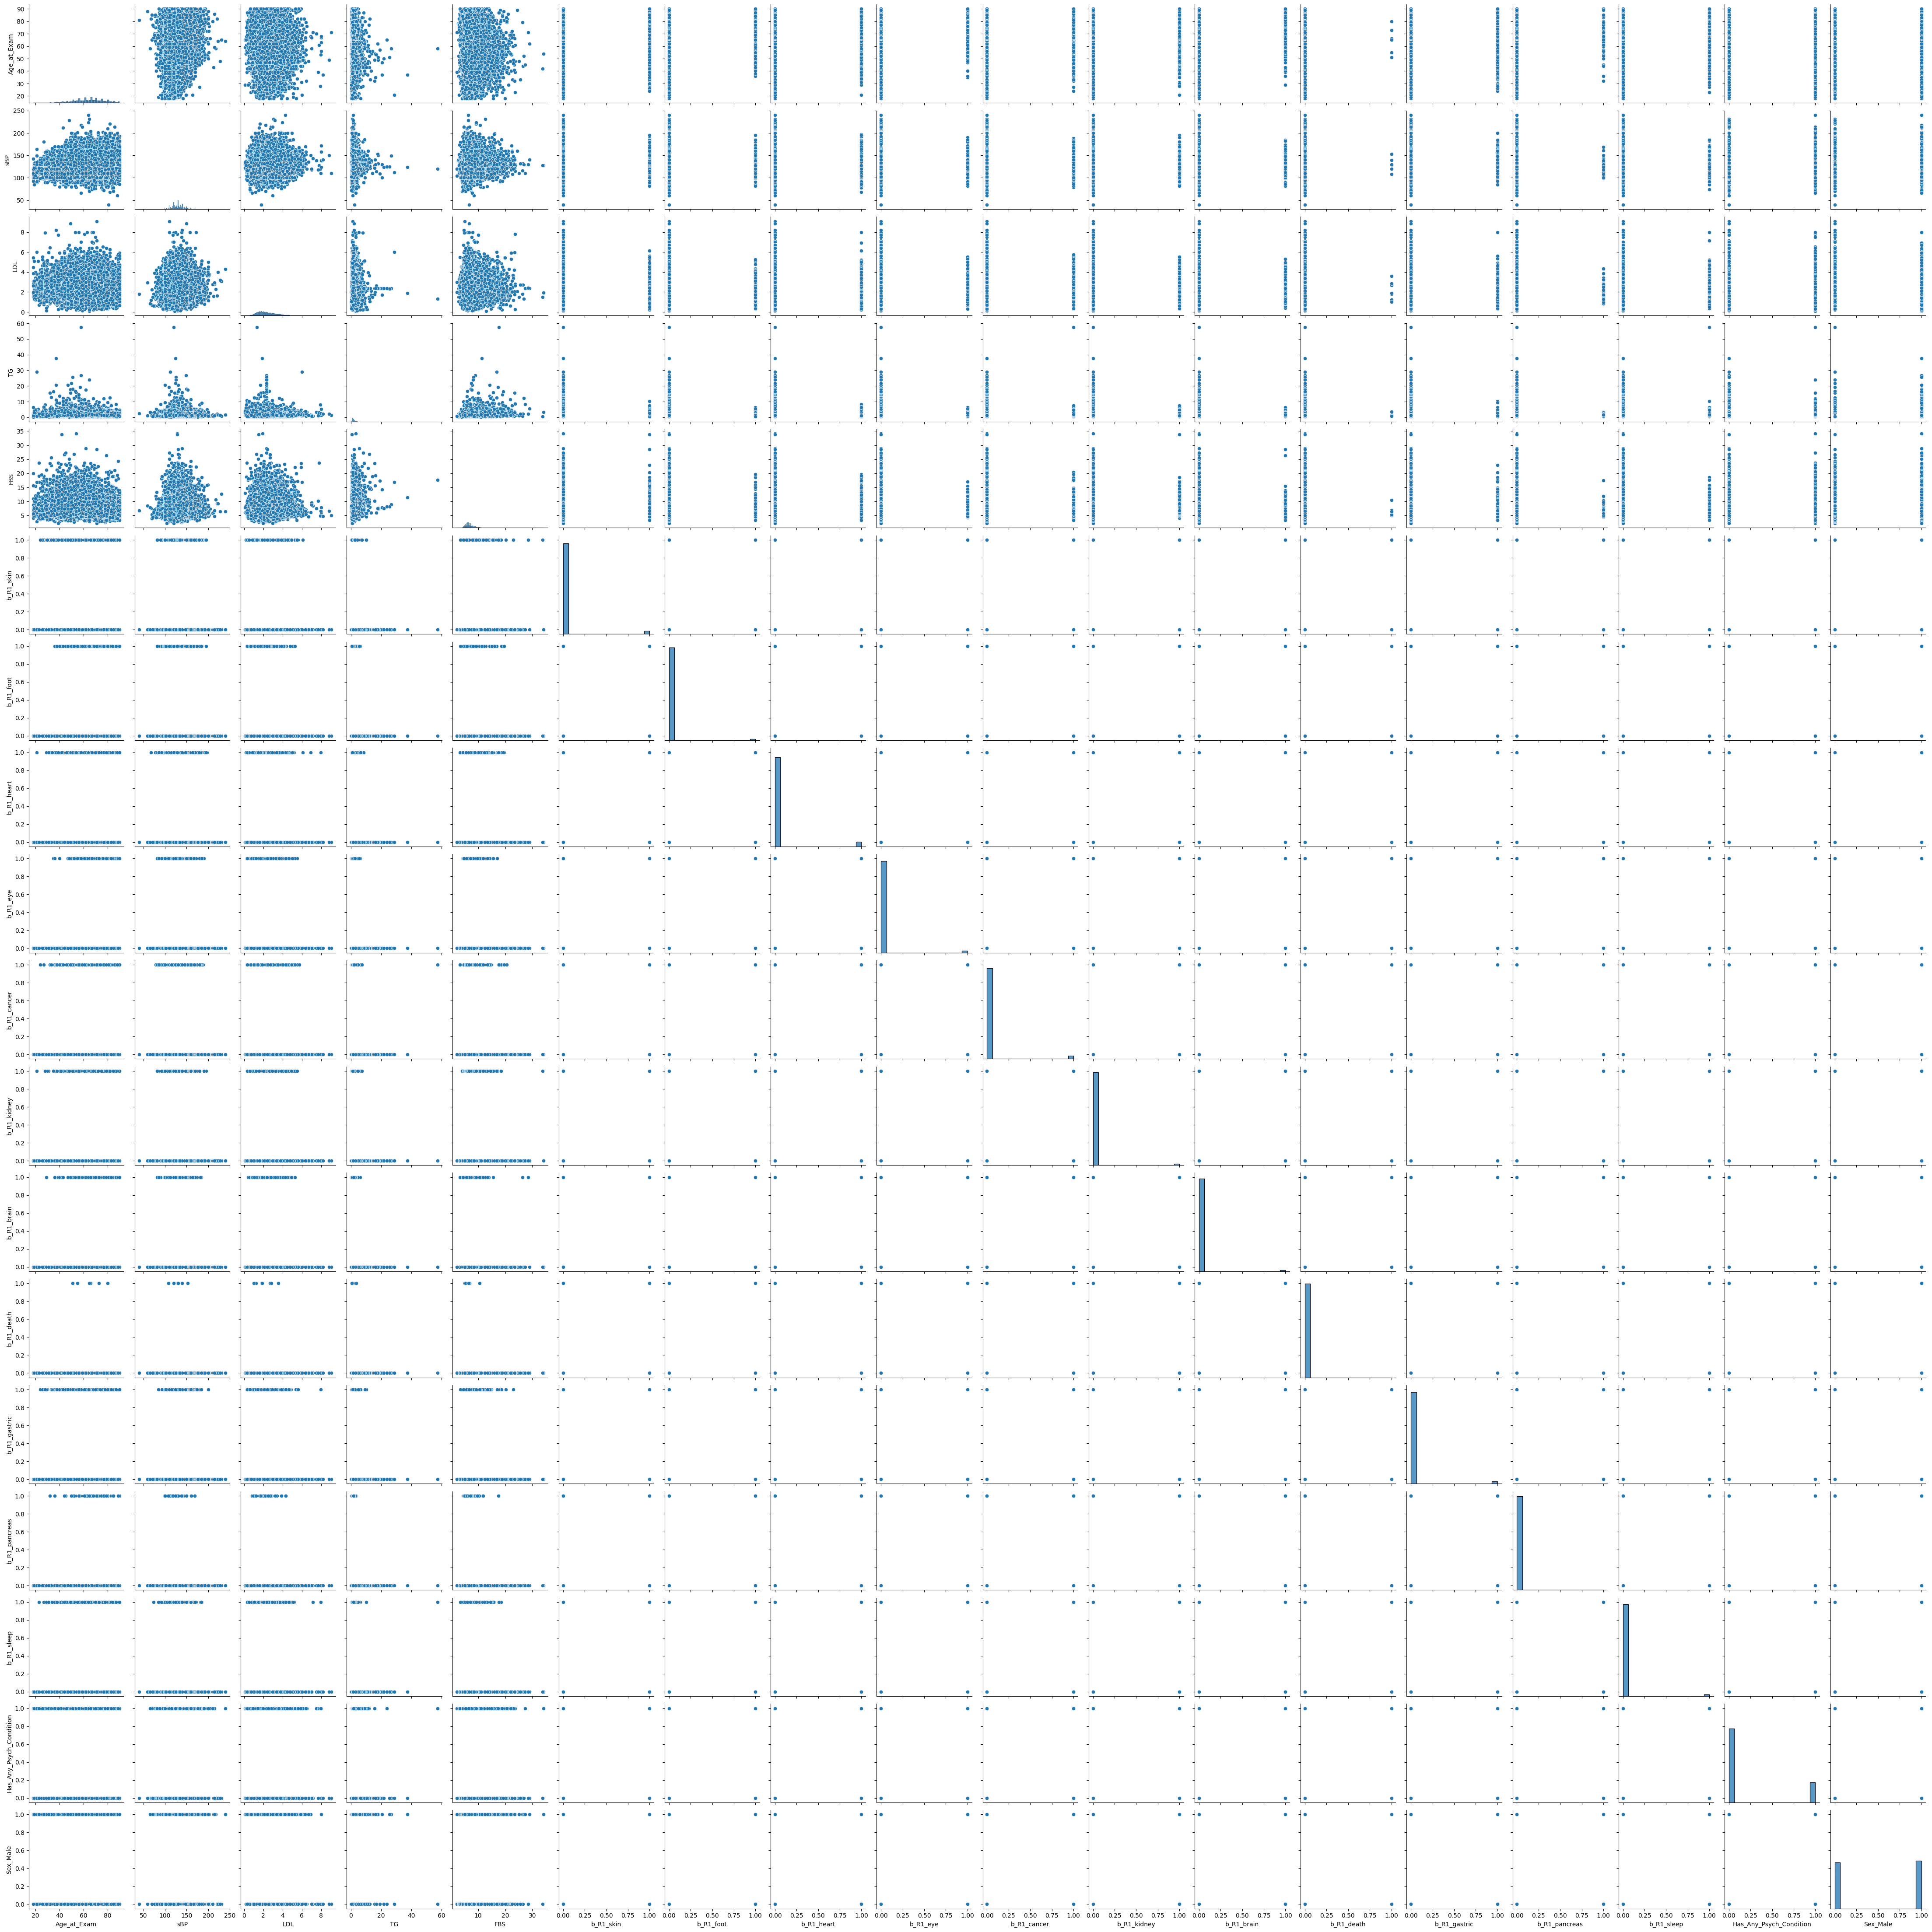

In [ ]:
# Scatter Plot Matrix
sns.pairplot(selected)
plt.show()

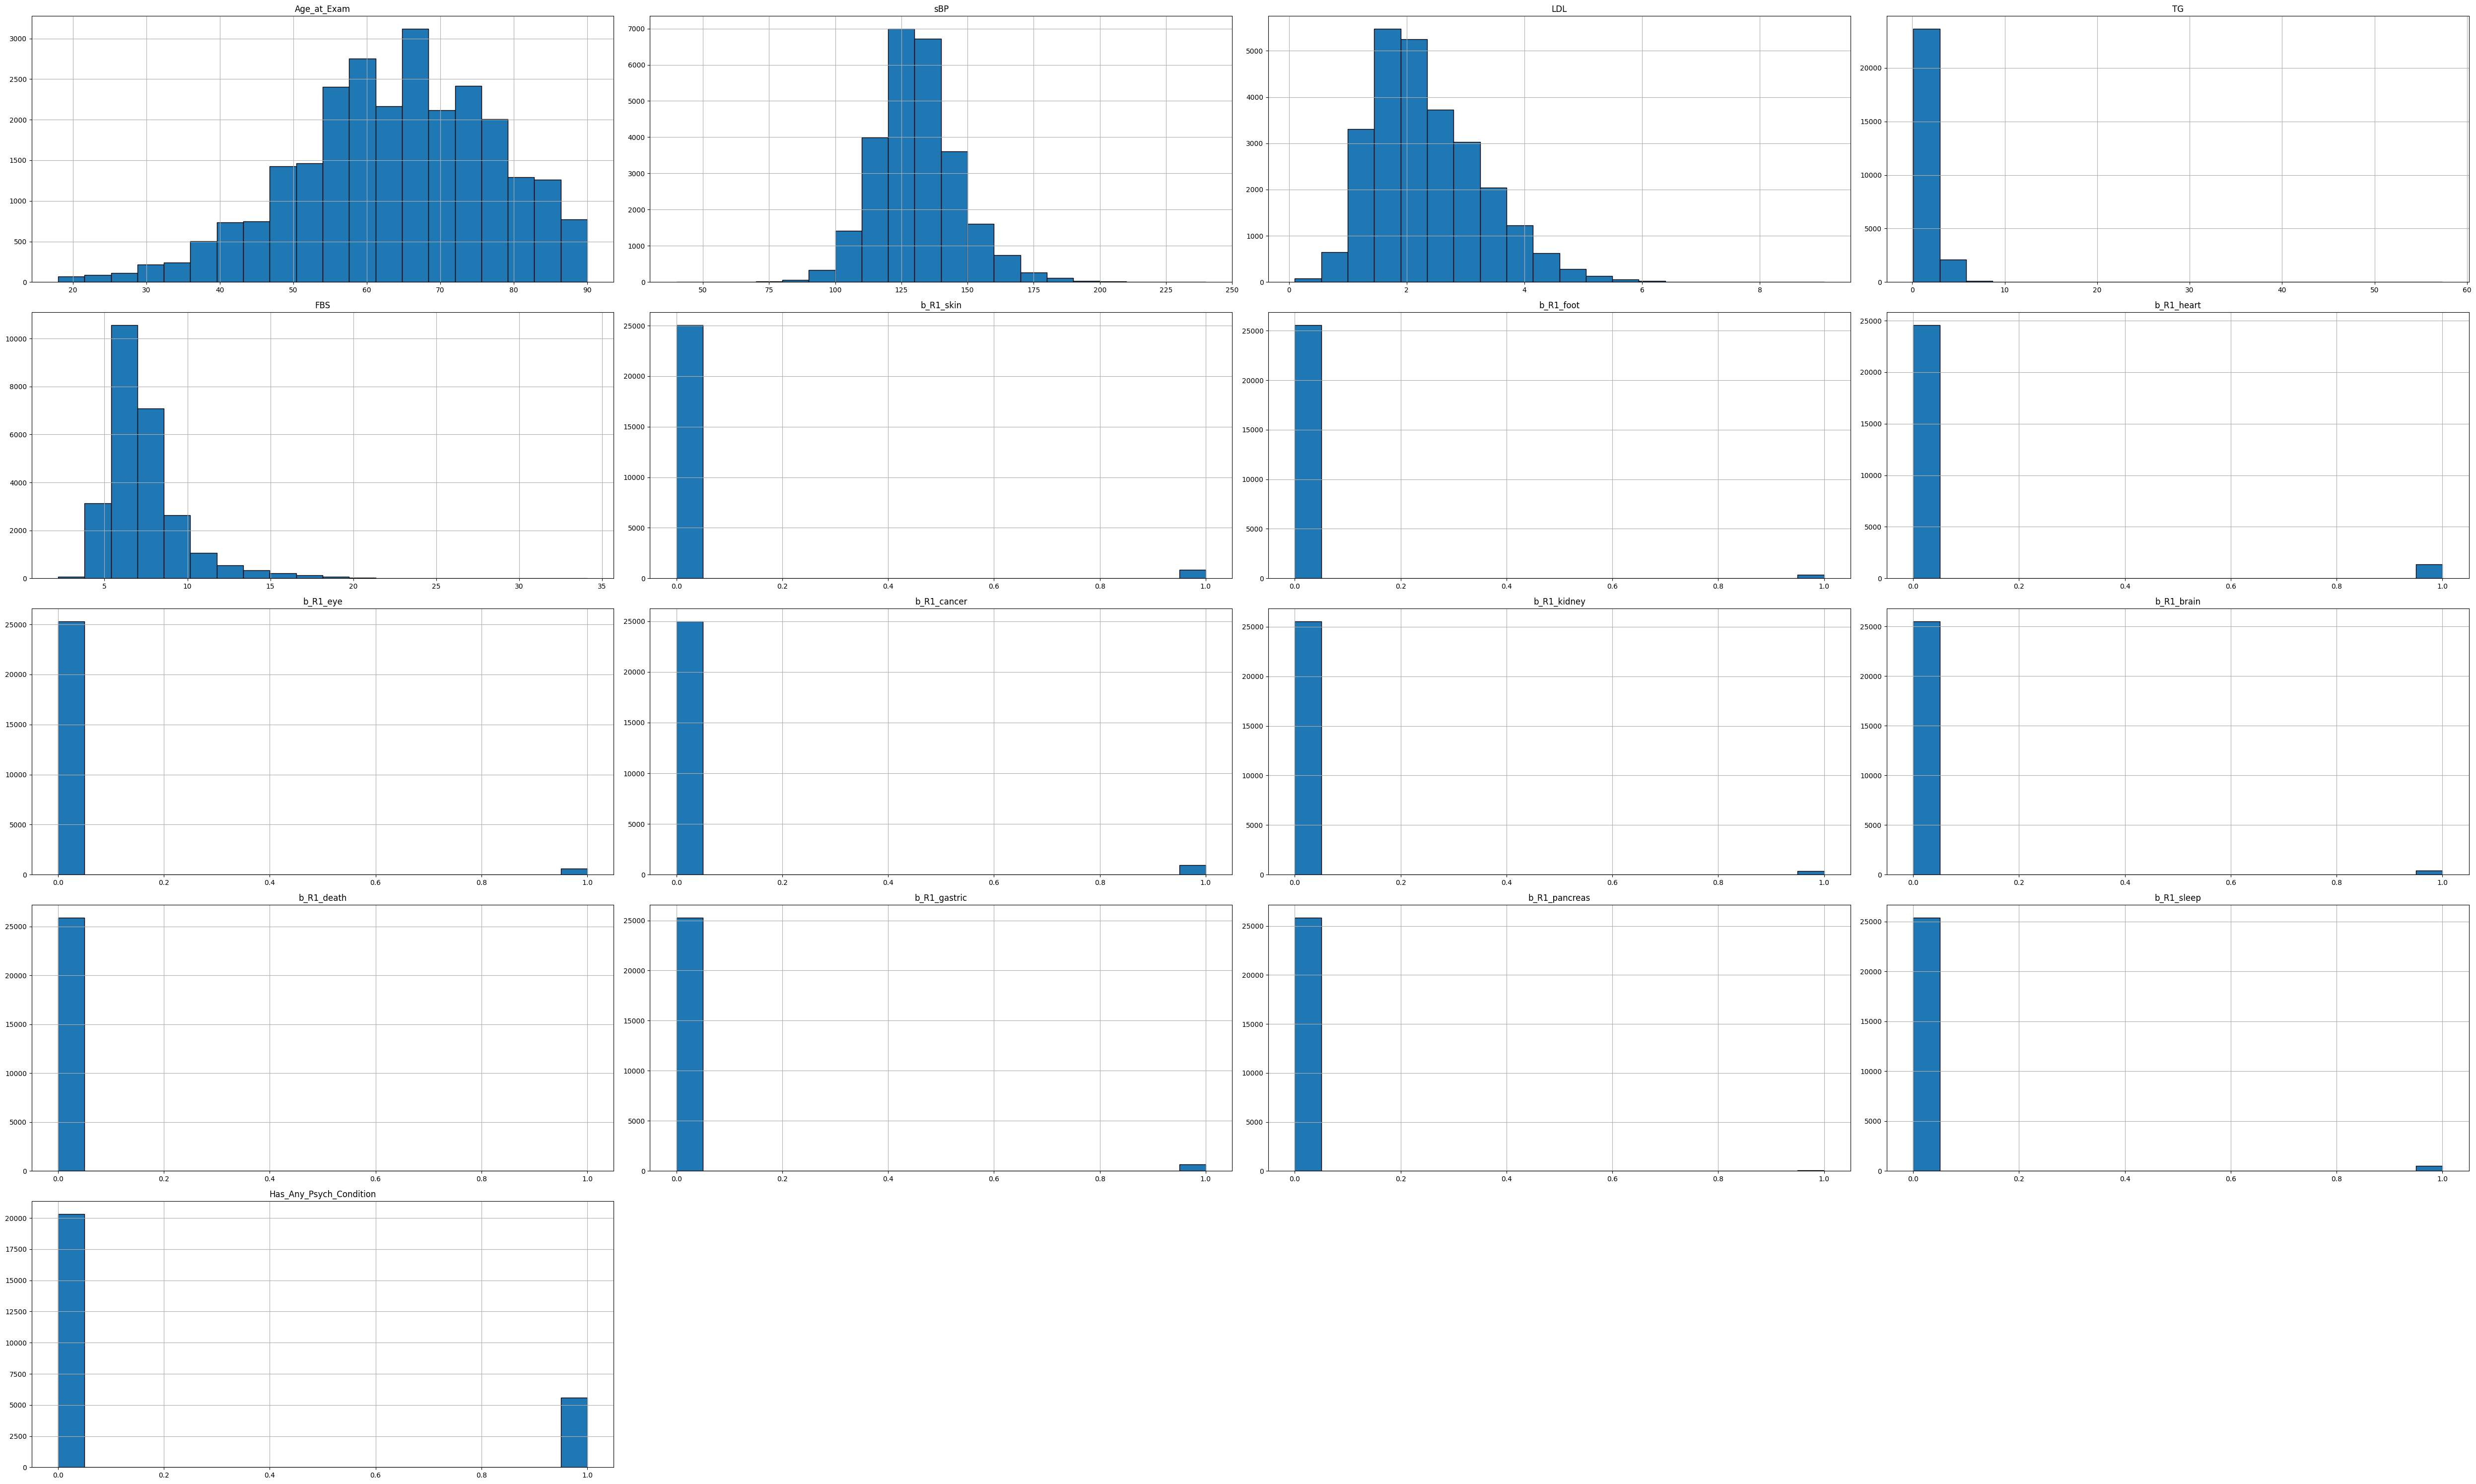

In [ ]:
# Histogram
bins = 20
selected.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

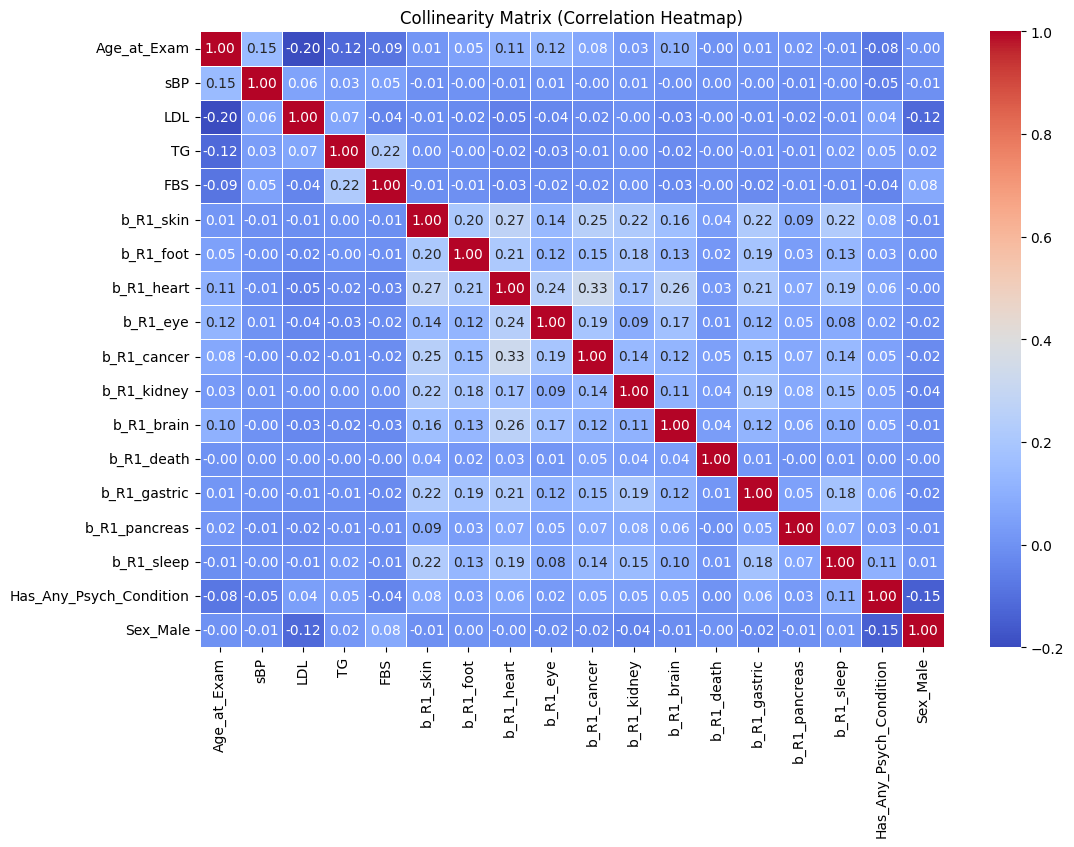

In [ ]:
# Compute the correlation matrix
corr_matrix = selected.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

#**Logistics Regression**


In [ ]:
# Split the data into features and target variable
X = selected.drop('Has_Any_Psych_Condition', axis=1)
y = selected['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[2455 1633]
 [ 436  660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      4088
           1       0.29      0.60      0.39      1096

    accuracy                           0.60      5184
   macro avg       0.57      0.60      0.55      5184
weighted avg       0.73      0.60      0.64      5184



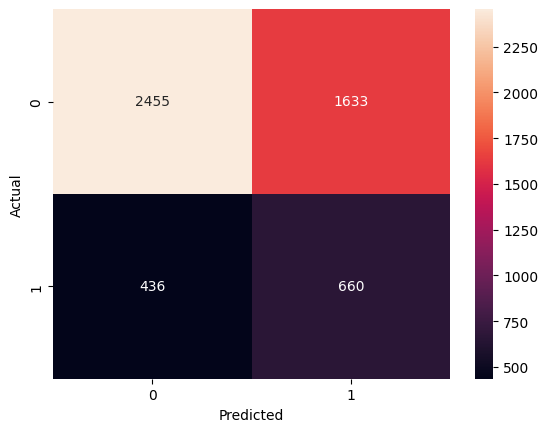

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.793981   0.684211  0.047445  0.088737  0.520787
1          L1  0.793981   0.684211  0.047445  0.088737  0.520787
2          L2  0.793981   0.684211  0.047445  0.088737  0.520787
3  ElasticNet  0.793981   0.684211  0.047445  0.088737  0.520787
4       Tuned  0.794174   0.693333  0.047445  0.088813  0.520910
